In [1]:
import pandas as pd

In [17]:
df=pd.read_csv("train_F3WbcTw.csv",encoding="ISO-8859-1")
df.head()
 

5279


In [5]:
import nltk
nltk.download('punkt')
 
reviews = df.text.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


66373


[u'.',
 u',',
 u'the',
 u'of',
 u'to',
 u'and',
 u'a',
 u'in',
 u'I',
 u')',
 u'(',
 u'for',
 u'is',
 u'with',
 u'that',
 u'or',
 u'on',
 u':',
 u'it',
 u'have',
 u'you',
 u'was',
 u'be',
 u'are',
 u'my',
 u'not',
 u'as',
 u'The',
 u'this',
 u'patients',
 u'at',
 u'your',
 u'but',
 u'cancer',
 u'from',
 u'treatment',
 u'by',
 u'?',
 u'had',
 u'has',
 u'an',
 u';',
 u'can',
 u'may',
 u'if',
 u'MS',
 u'%',
 u'been',
 u'about',
 u'more']

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
frequency_dist = nltk.FreqDist(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


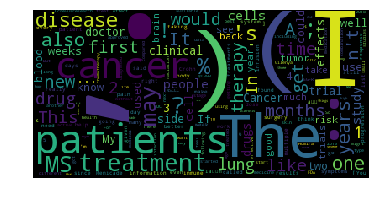

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
df.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why youâd want t...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [26]:
X_train = df.loc[:4000, 'text'].values
y_train = df.loc[:4000, 'sentiment'].values
X_test = df.loc[4001:, 'text'].values
y_test = df.loc[4001:, 'sentiment'].values

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)
type(train_vectors)
mp=pd.DataFrame(train_vectors.toarray())
mp.head()

((4001, 38202), (1278, 38202))


,0,1,2,3,4,5,6,7,8,9,...,38192,38193,38194,38195,38196,38197,38198,38199,38200,38201
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [29]:
from  sklearn.metrics  import accuracy_score
from  sklearn.metrics  import f1_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))
print(f1_score(y_test,predicted,average='macro'))

0.7206572769953051
0.2792178262846749
